In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def simulate_energy_data(n_hours=7*24, seed=0):
    # random seed for reproducibility
    np.random.seed(seed)
    
    # time index representing each hour
    time = np.arange(n_hours)

    # linear trend to simulate gradual increase in energy use
    trend = 0.01 * time

    # repeating daily seasonality pattern using a sine wave (24-hour cycle)
    seasonality = 5 * np.sin(2 * np.pi * time / 24)

    # outdoor temperature with a daily cycle and phase shift (peak not at midnight)
    temperature = 20 + 5 * np.sin(2 * np.pi * time / 24 + np.pi/3)

    # occupancy during 8 AM to 6 PM, and add slight noise
    occupancy = (time % 24 >= 8) & (time % 24 <= 18)
    occupancy = occupancy.astype(int) * (1 + 0.2 * np.random.randn(n_hours))  # Add noise

    # combine all factors to calculate total energy consumption
    # - base load = 10
    # - influences: trend, seasonality, temperature, occupancy
    # - random noise for realism
    energy = 10 + trend + seasonality + 0.5 * temperature + 2 * occupancy + np.random.normal(0, 1, n_hours)

    # create dataframe
    df = pd.DataFrame({
        'energy': energy,           # simulated target variable (kWh/hour) (?)
        'temperature': temperature, # (?)
        'occupancy': occupancy      # (?)
    })

    return df

In [3]:
building_df = simulate_energy_data() # simulation

In [4]:
building_df.head() # confirm the loading

,energy,temperature,occupancy
0,23.353093,24.330127,0.0
1,24.035852,24.829629,0.0
2,25.940859,25.000000,0.0
3,26.299076,24.829629,0.0
4,27.392021,24.330127,0.0


Basic Statistics:
           energy  temperature   occupancy
count  168.000000   168.000000  168.000000
mean    21.661160    20.000000    0.461117
std      4.430097     3.546104    0.520598
min     13.888483    15.000000    0.000000
25%     17.568832    16.464466    0.000000
50%     22.048938    20.000000    0.000000
75%     25.929588    23.535534    0.949385
max     30.039107    25.000000    1.388724


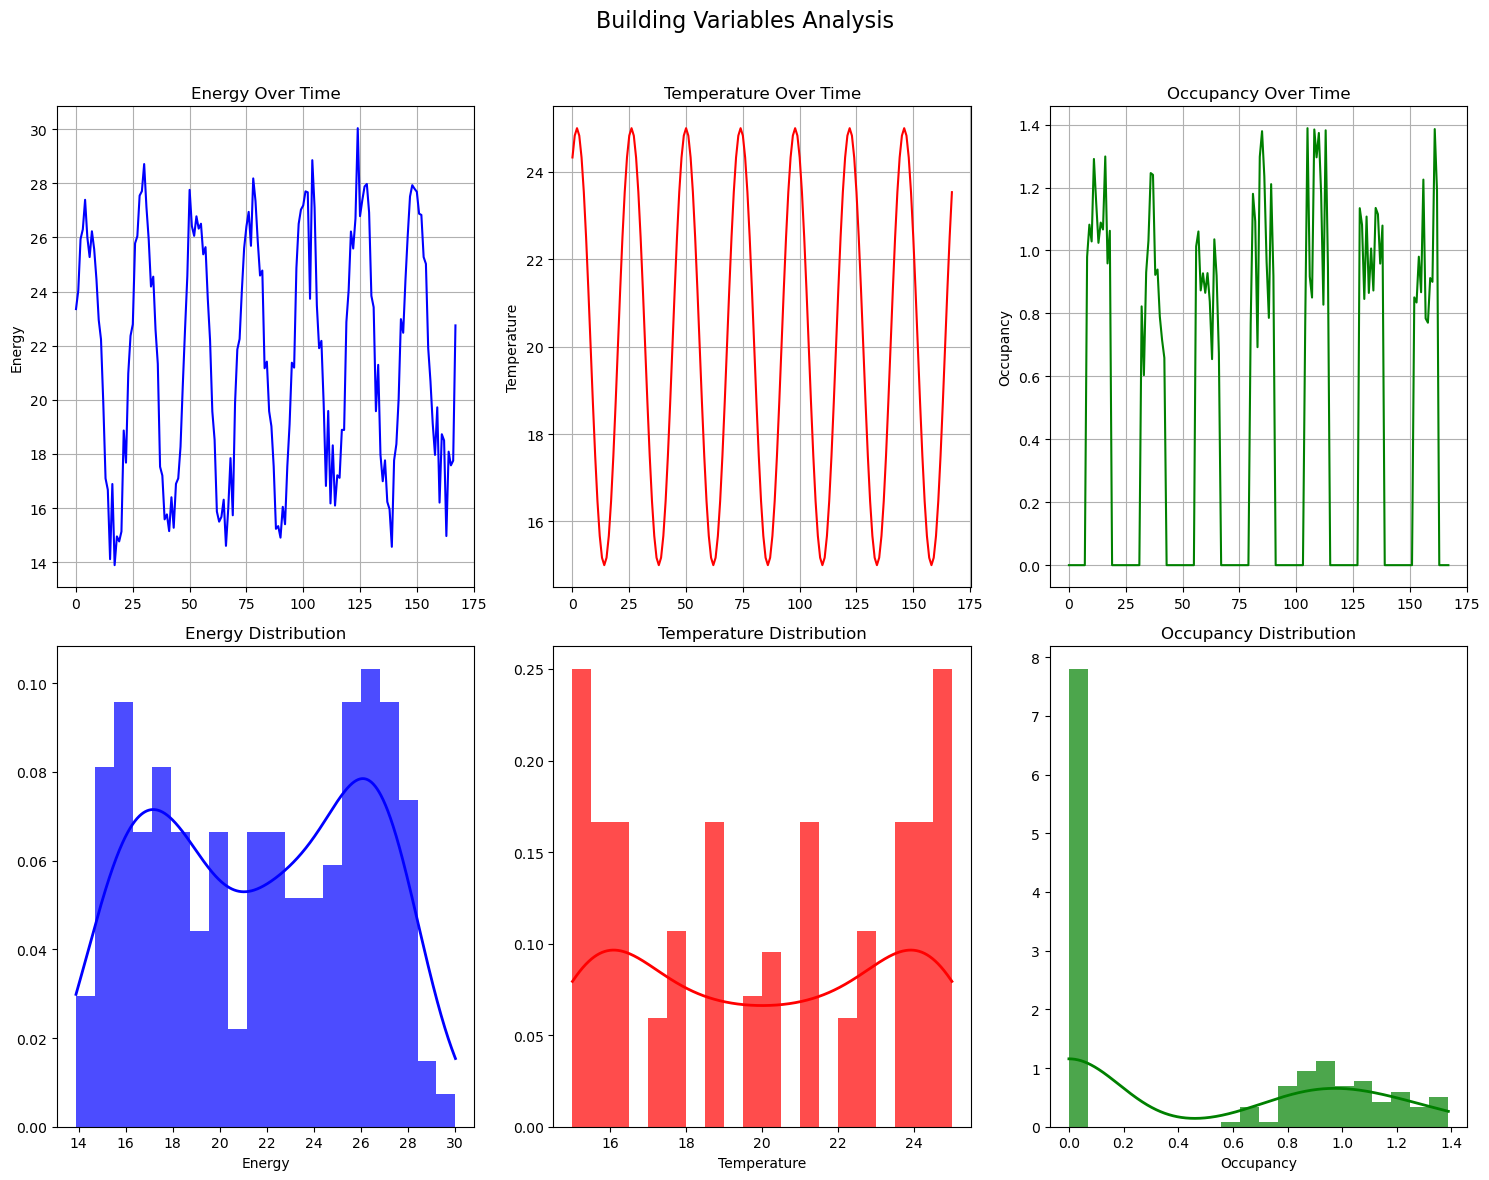

In [5]:
# display basic statistics
stats_df = building_df[['energy', 'temperature', 'occupancy']].describe()
print("Basic Statistics:")
print(stats_df)

# subplots for visualizing each variable
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Building Variables Analysis', fontsize=16)

# time series for each variable
axes[0, 0].plot(building_df.index, building_df['energy'], color='blue')
axes[0, 0].set_title('Energy Over Time')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].grid(True)

axes[0, 1].plot(building_df.index, building_df['temperature'], color='red')
axes[0, 1].set_title('Temperature Over Time')
axes[0, 1].set_ylabel('Temperature')
axes[0, 1].grid(True)

axes[0, 2].plot(building_df.index, building_df['occupancy'], color='green')
axes[0, 2].set_title('Occupancy Over Time')
axes[0, 2].set_ylabel('Occupancy')
axes[0, 2].grid(True)

# histograms with kernel density estimation (KDE)
axes[1, 0].hist(building_df['energy'], bins=20, color='blue', alpha=0.7, density=True)

energy_kde = stats.gaussian_kde(building_df['energy'].dropna())
x_energy = np.linspace(building_df['energy'].min(), building_df['energy'].max(), 1000)
axes[1, 0].plot(x_energy, energy_kde(x_energy), 'b-', linewidth=2)
axes[1, 0].set_title('Energy Distribution')
axes[1, 0].set_xlabel('Energy')

axes[1, 1].hist(building_df['temperature'], bins=20, color='red', alpha=0.7, density=True)

temp_kde = stats.gaussian_kde(building_df['temperature'].dropna())
x_temp = np.linspace(building_df['temperature'].min(), building_df['temperature'].max(), 1000)
axes[1, 1].plot(x_temp, temp_kde(x_temp), 'r-', linewidth=2)
axes[1, 1].set_title('Temperature Distribution')
axes[1, 1].set_xlabel('Temperature')

axes[1, 2].hist(building_df['occupancy'], bins=20, color='green', alpha=0.7, density=True)

occ_kde = stats.gaussian_kde(building_df['occupancy'].dropna())
x_occ = np.linspace(building_df['occupancy'].min(), building_df['occupancy'].max(), 1000)
axes[1, 2].plot(x_occ, occ_kde(x_occ), 'g-', linewidth=2)
axes[1, 2].set_title('Occupancy Distribution')
axes[1, 2].set_xlabel('Occupancy')



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [6]:
building_df.to_excel('sim_building_data.xlsx')